<a href="https://colab.research.google.com/github/UZH-Cyrill-Meier/NetworkScience/blob/main/Assignments/assignment%203/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3


*   Tanja Gurtner - 17-677-295
*   Cyrill Georg Meier - 17-552-316

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from PIL import Image
import scipy.stats as stats

## Preparation
Download data from Git repository

In [30]:
import os
import requests

# GitHub repository and folder details
repo_owner = "UZH-Cyrill-Meier"
repo_name = "NetworkScience"
folder_path = "Assignments/assignment 3/data"

# GitHub API URL to get contents of the folder
api_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/{folder_path}"

# Base URL for raw file download
raw_base_url = f"https://raw.githubusercontent.com/{repo_owner}/{repo_name}/main/{folder_path}/"

# Local directory where you want to save the downloaded files
local_directory = "data"

# Create the local directory if it doesn't exist
if not os.path.exists(local_directory):
    os.makedirs(local_directory)

# Function to download a file from the raw GitHub URL
def download_file(file_name):
    file_url = raw_base_url + file_name
    local_path = os.path.join(local_directory, file_name)
    try:
        response = requests.get(file_url)
        response.raise_for_status()  # Check if the request was successful
        with open(local_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded: {local_path}")
    except Exception as e:
        print(f"Error downloading {file_name}: {e}")

# Get the list of files in the GitHub folder
response = requests.get(api_url)
if response.status_code == 200:
    files = response.json()
    for file_info in files:
        if file_info['type'] == 'file':  # Check if it's a file (not a directory)
            file_name = file_info['name']
            download_file(file_name)
else:
    print(f"Failed to retrieve folder contents: {response.status_code}")



Downloaded: data/graph_eu_airlines.gml
Downloaded: data/graph_game_thrones.gml
Downloaded: data/graph_jazz_collab.gml


Get all existing files

In [31]:

directory = os.fsencode(local_directory)

files = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".gml"):
        files.append(os.path.join(local_directory, filename))
        continue
    else:
        continue

Read all the files and add to dict `graphs`

In [32]:
graphs = []
for file in files:
  graphs.append(nx.read_gml(file))


In [33]:
graphs

In [34]:
def plot_network_graph(G):
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray', font_size=12, font_weight='bold')
    plt.show()


## Exercise 1
(1 points) Compute degree, closeness, betweenness and eigenvector centrality for each node. Plot the
distribution for each of the centralities, paying attention to binning.

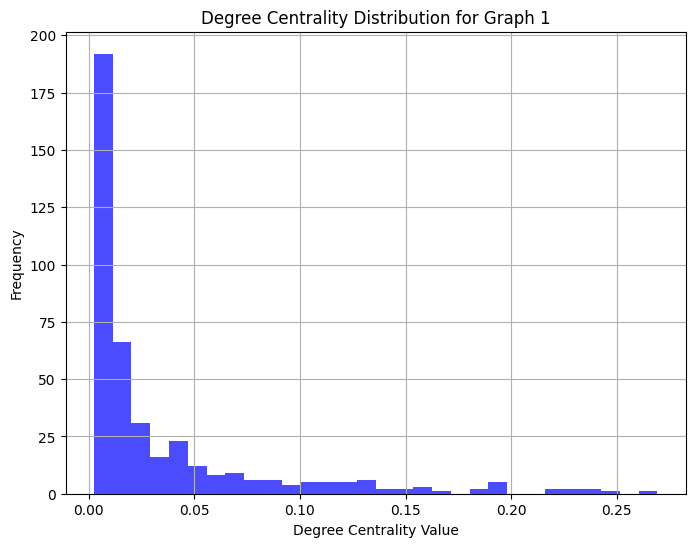

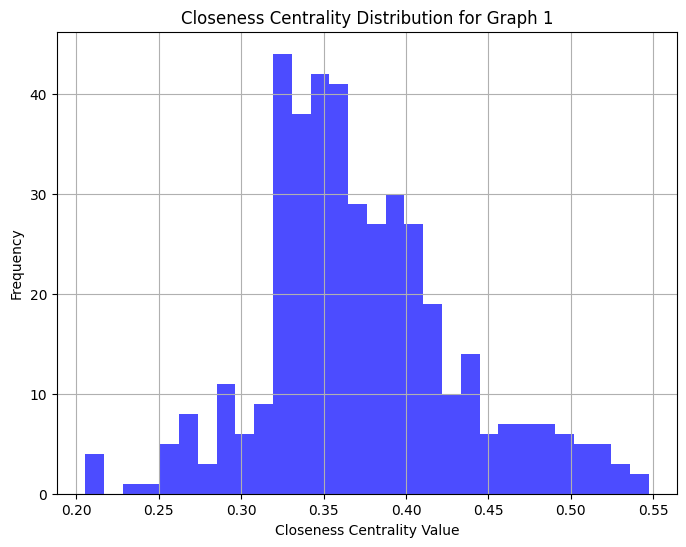

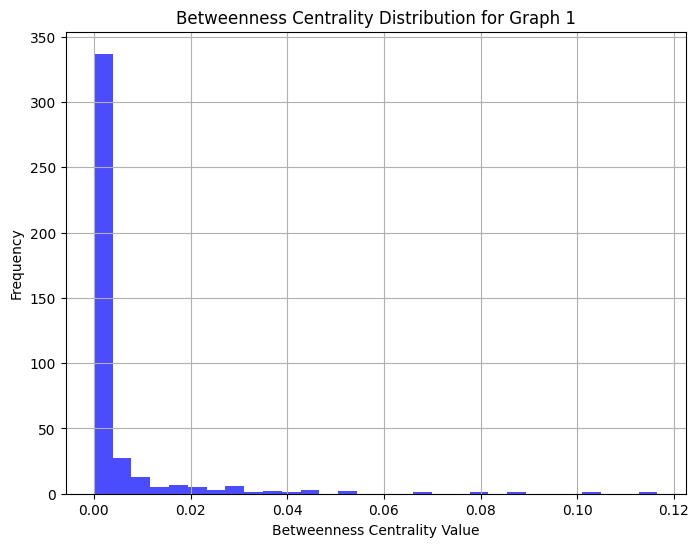

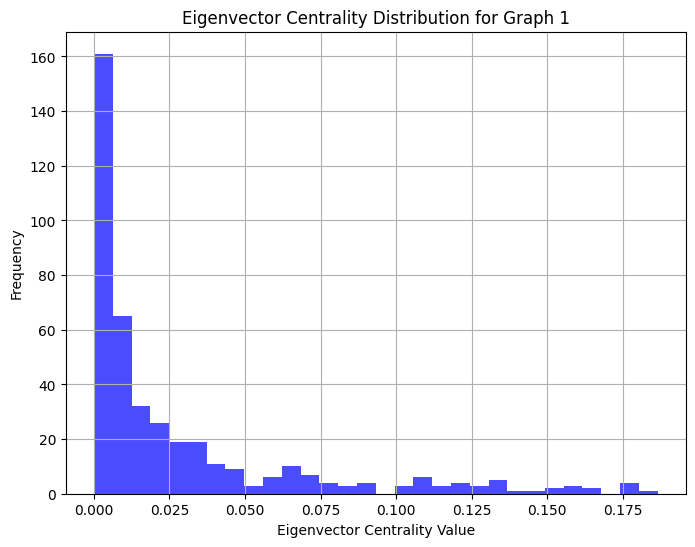

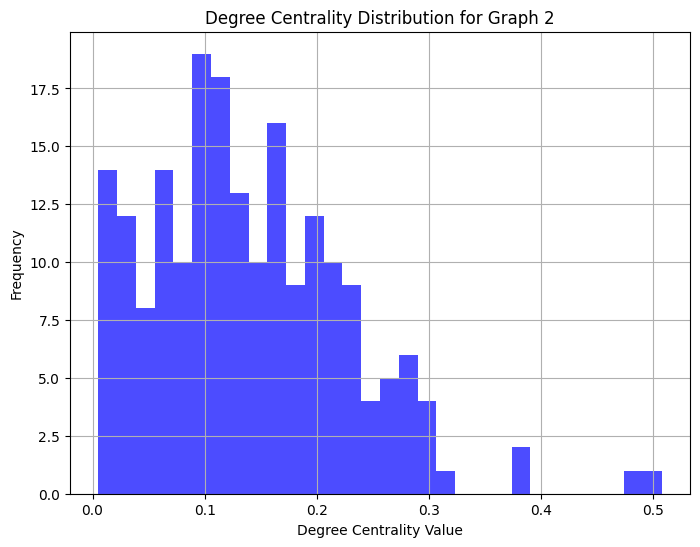

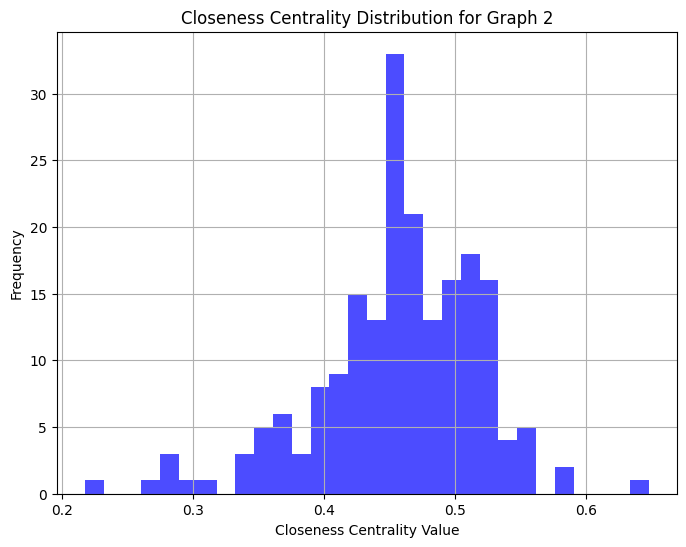

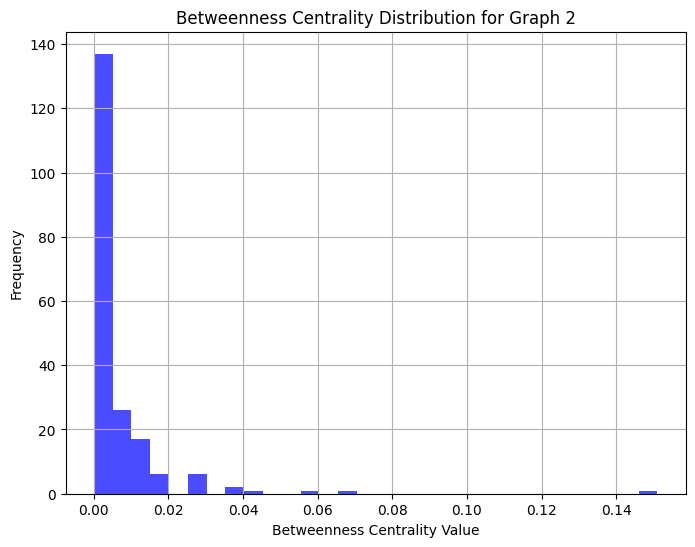

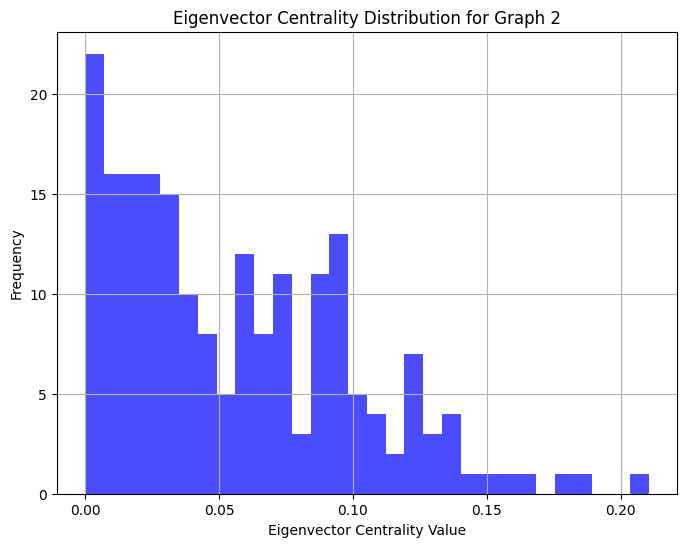

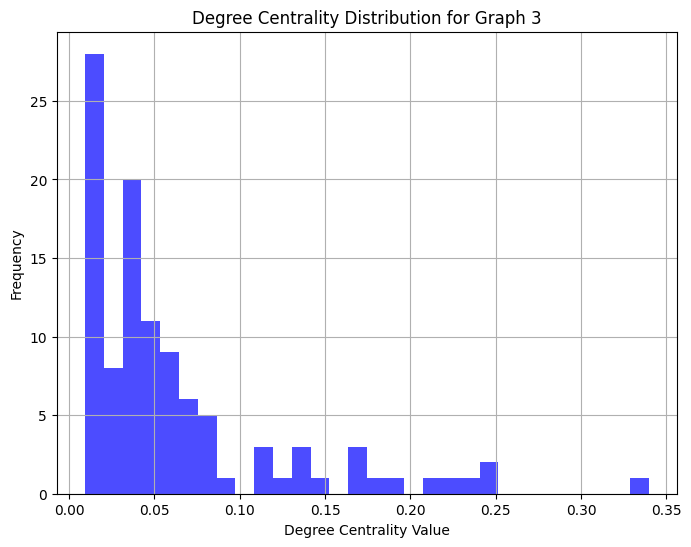

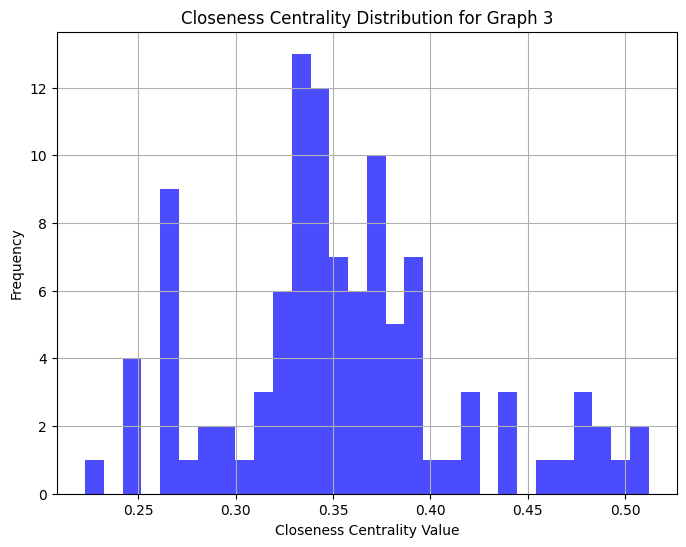

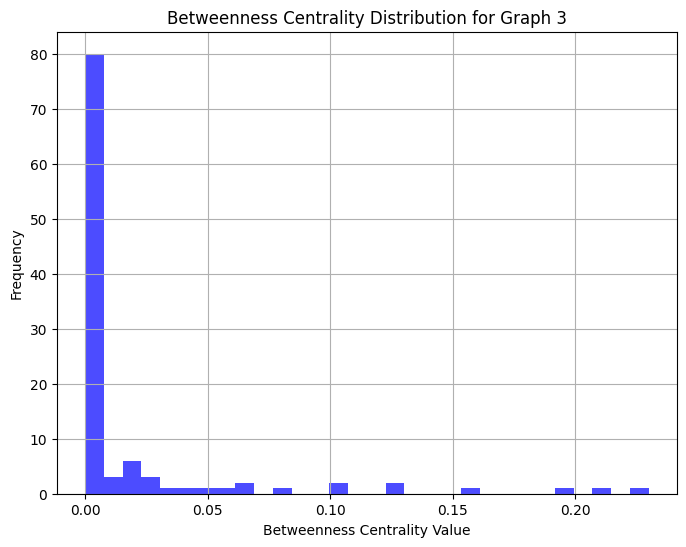

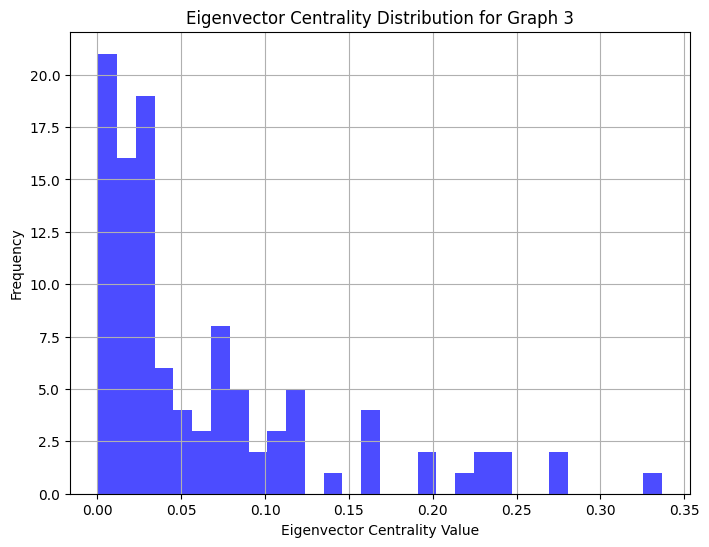

In [40]:
# Function to compute all centralities for a given graph
def compute_centralities(graph):
    return {
        'Degree Centrality': nx.degree_centrality(graph),
        'Closeness Centrality': nx.closeness_centrality(graph),
        'Betweenness Centrality': nx.betweenness_centrality(graph),
        'Eigenvector Centrality': nx.eigenvector_centrality(graph)
    }

# Function to plot the distribution of a centrality
def plot_centrality_distribution(values, centrality_name, graph_name):
    plt.figure(figsize=(8, 6))
    plt.hist(values, bins=30, color='b', alpha=0.7)
    plt.title(f'{centrality_name} Distribution for {graph_name}')
    plt.xlabel(f'{centrality_name} Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Iterate over graphs and plot the centrality distributions
for idx, G in enumerate(graphs):
    graph_name = f'Graph {idx + 1}'

    centralities = compute_centralities(G)  # Compute all centralities at once

    # Plot distributions for each centrality
    for centrality_name, values in centralities.items():
        plot_centrality_distribution(list(values.values()), centrality_name, graph_name)


## Exercise 2

 (2 points) Do a scatter plot of each pair of centralities (6 plots total). Compute the Pearson, Spearman and Kendall correlation coefficient for each pair and note them on the scatter plots.

**Hint**: centrality measures are available in `NetworkX`, while correlation coefficients are available in the module `scipy.stats`.


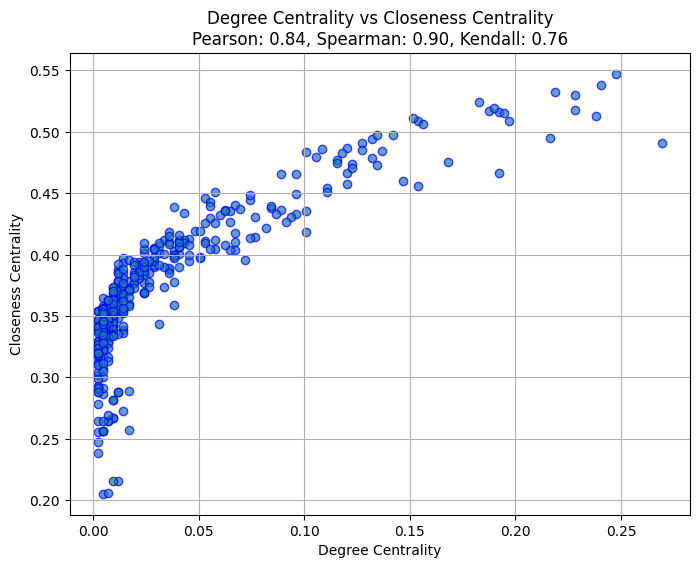

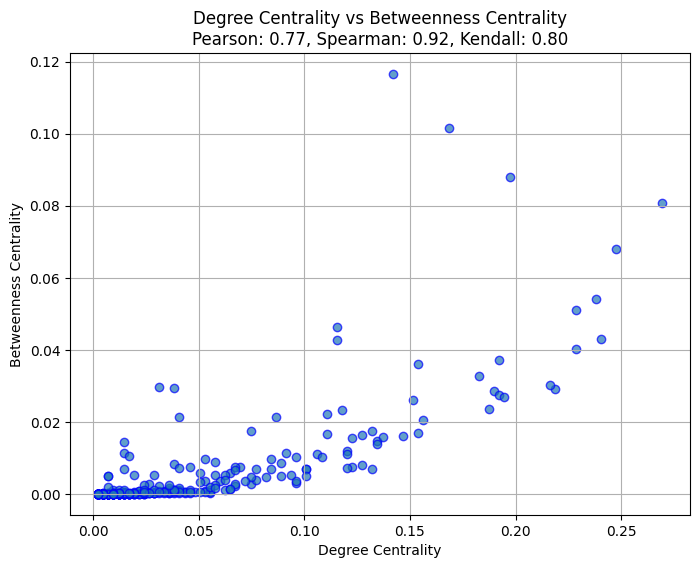

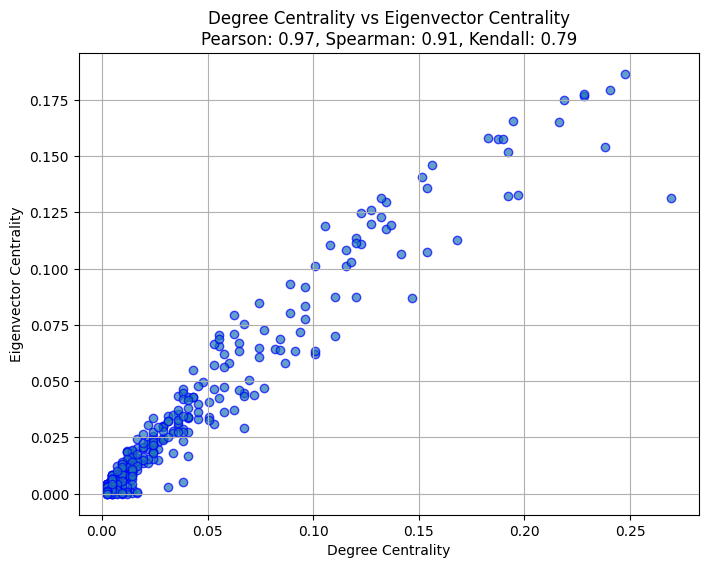

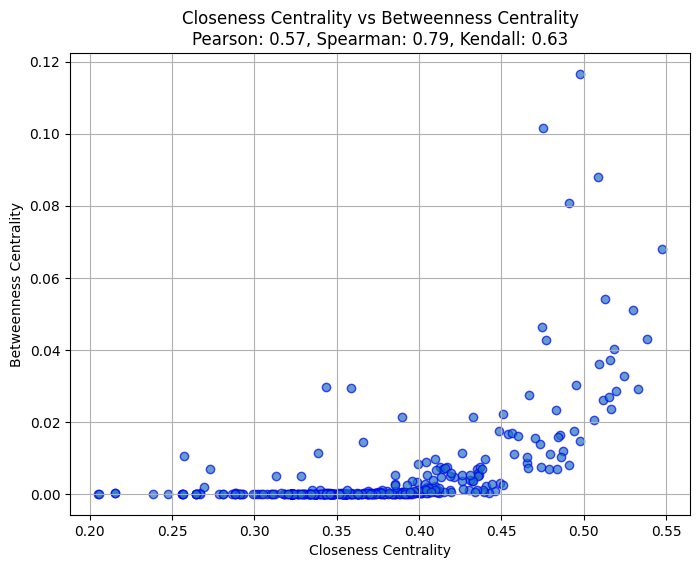

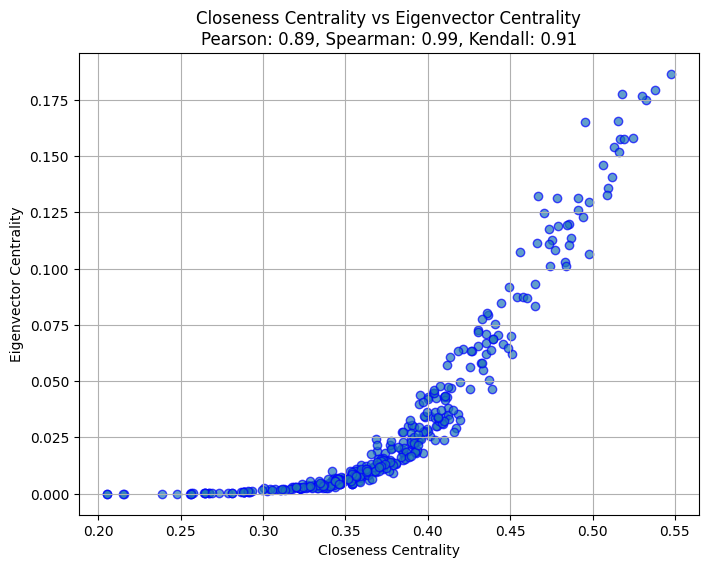

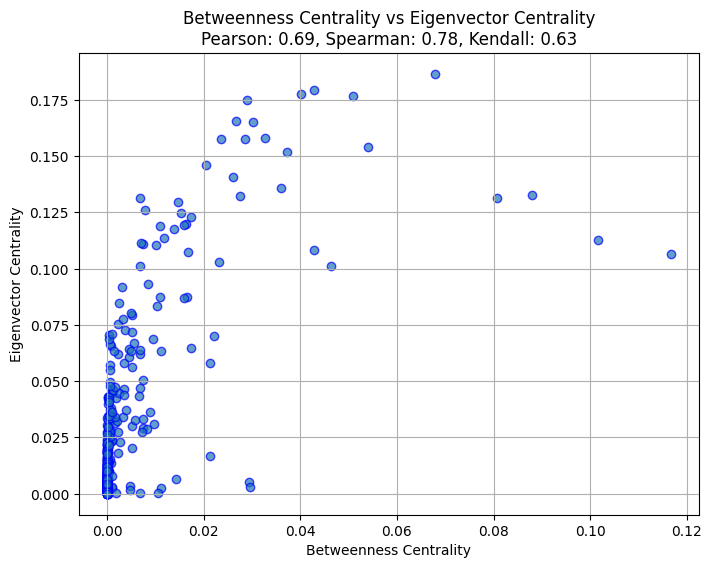

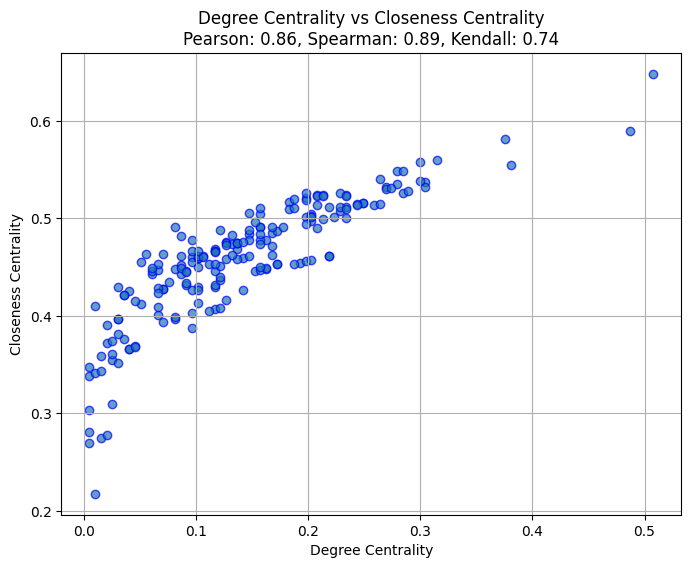

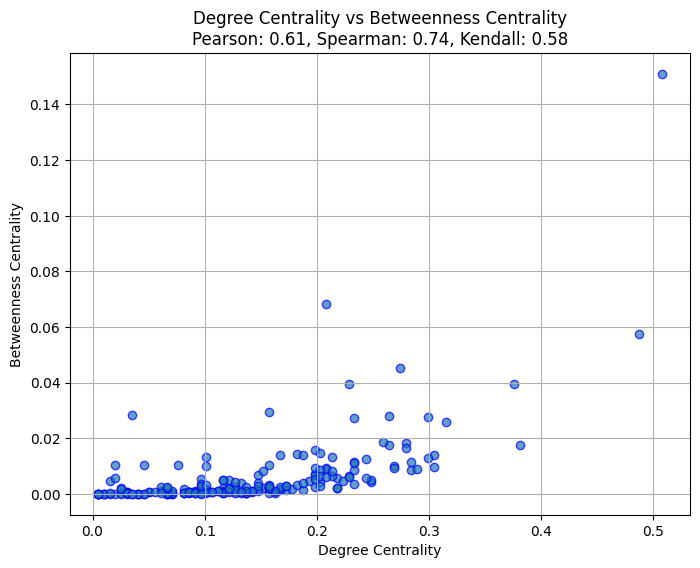

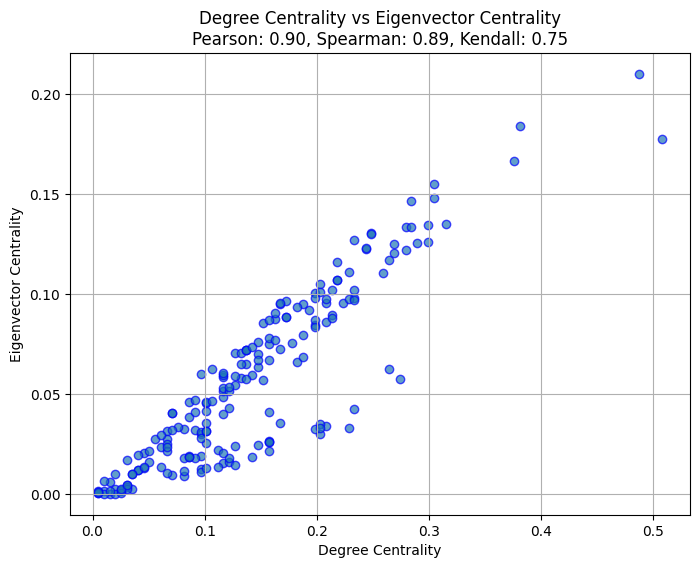

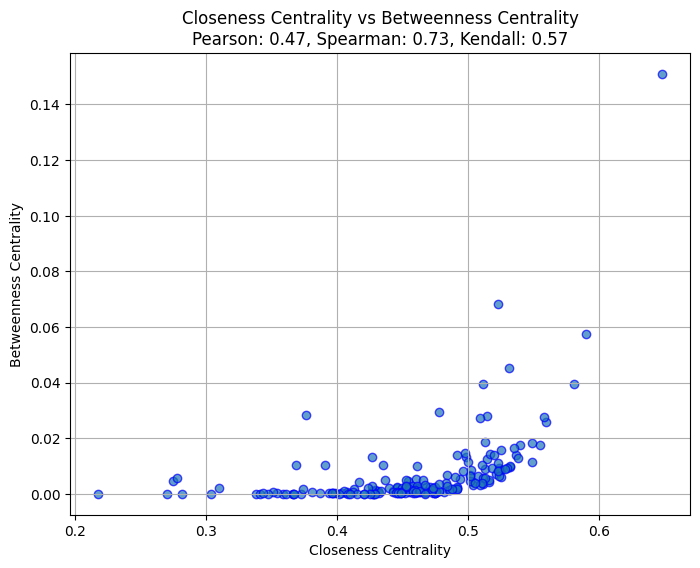

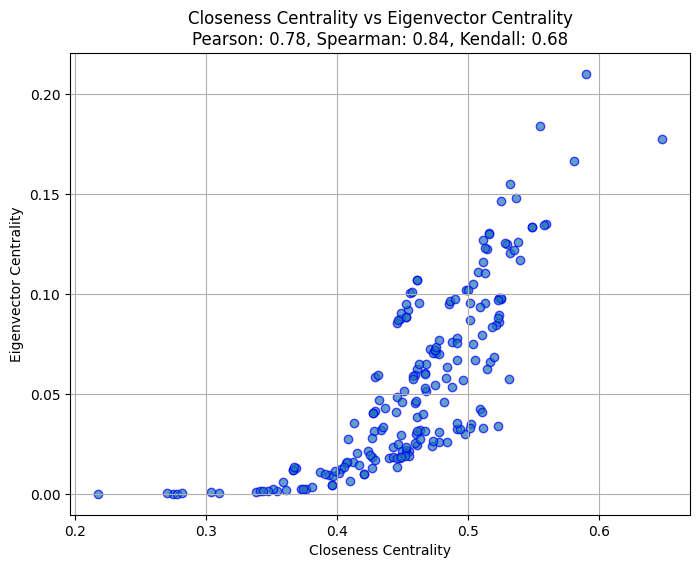

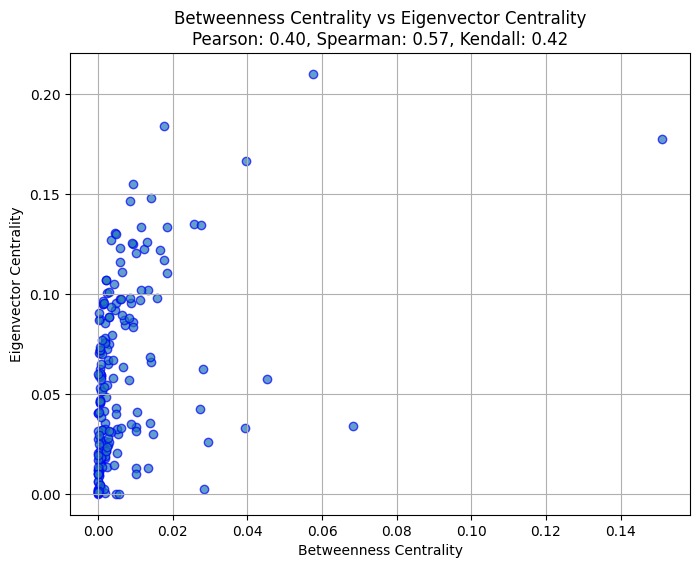

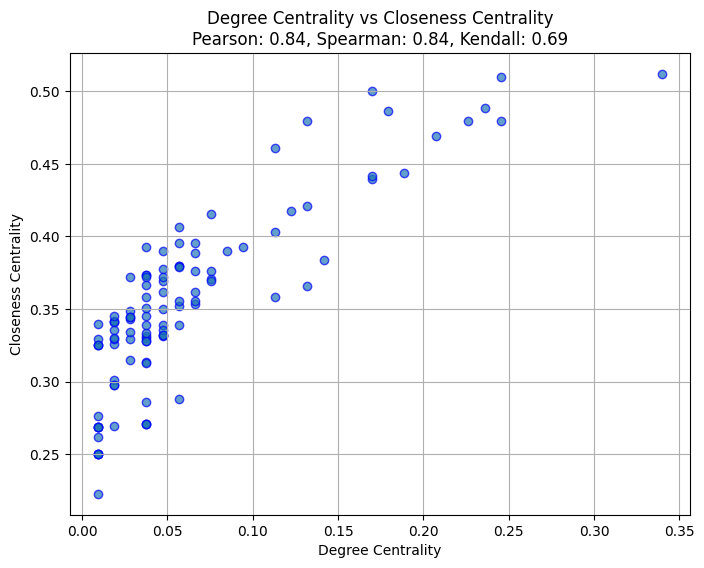

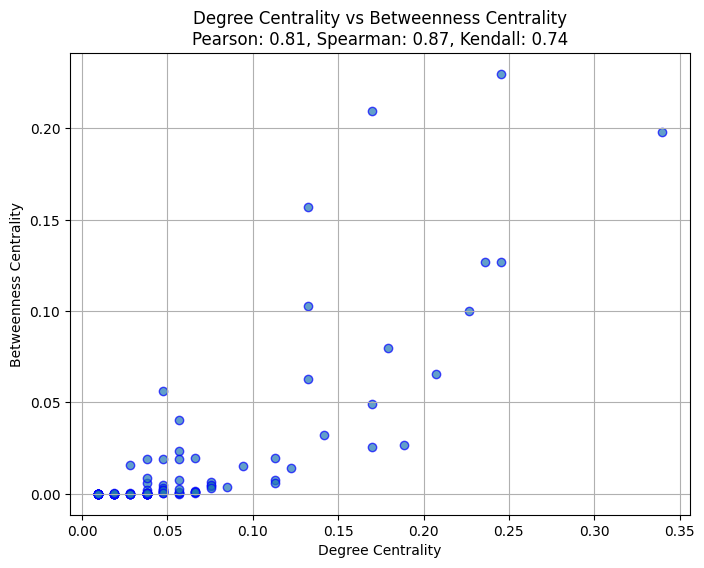

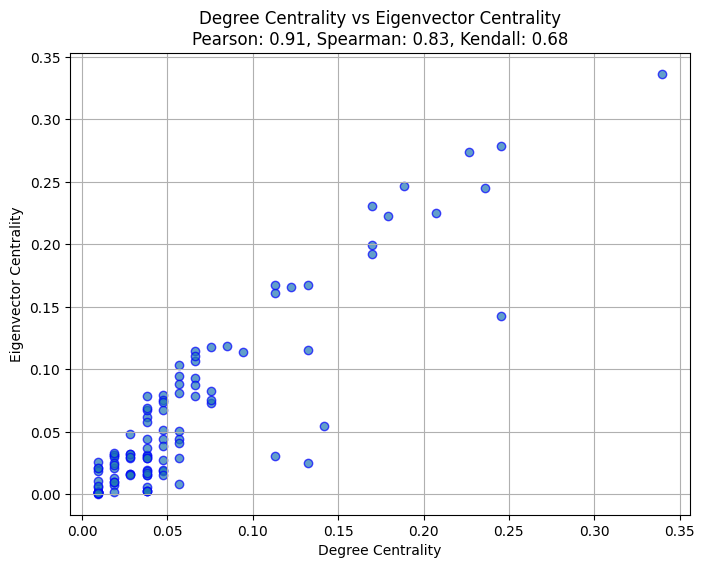

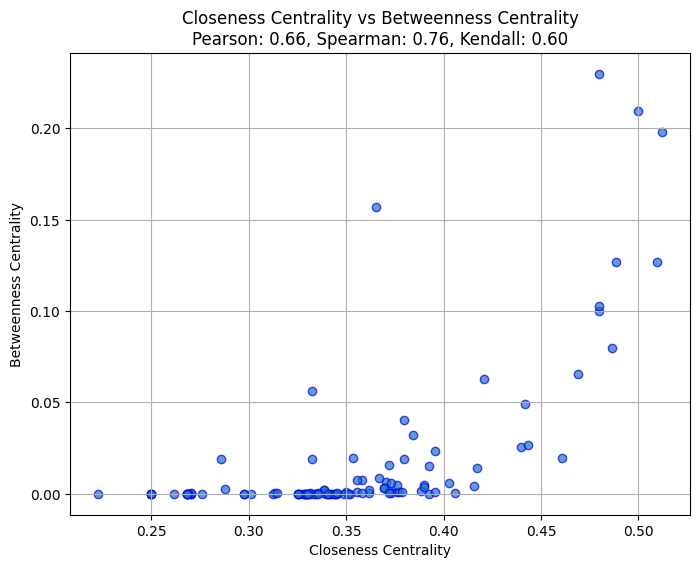

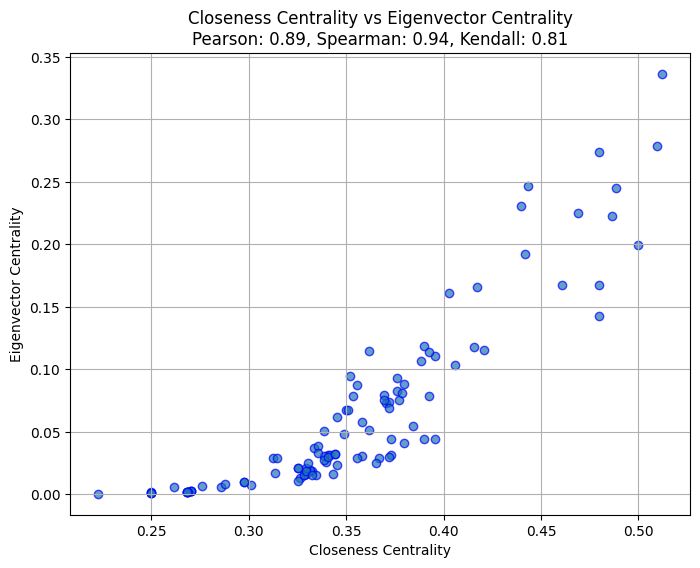

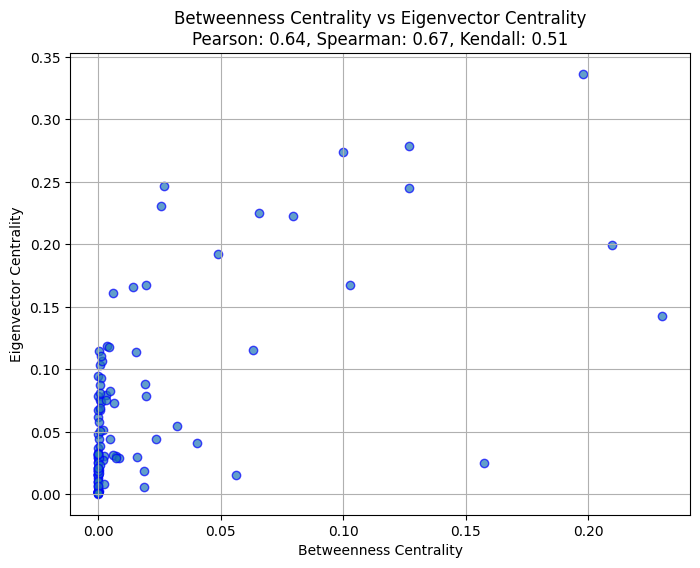

In [41]:



# Compute centralities for the graph
def compute_centralities(graph):
    return {
        'Degree Centrality': nx.degree_centrality(graph),
        'Closeness Centrality': nx.closeness_centrality(graph),
        'Betweenness Centrality': nx.betweenness_centrality(graph),
        'Eigenvector Centrality': nx.eigenvector_centrality(graph)
    }

# Function to calculate correlation coefficients
def compute_correlations(x, y):
    pearson_corr, _ = stats.pearsonr(x, y)
    spearman_corr, _ = stats.spearmanr(x, y)
    kendall_corr, _ = stats.kendalltau(x, y)
    return pearson_corr, spearman_corr, kendall_corr

# Function to plot scatter plots with correlation annotations
def plot_scatter_with_correlation(x, y, xlabel, ylabel, graph_name):
    pearson_corr, spearman_corr, kendall_corr = compute_correlations(x, y)

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.7, edgecolor='b')

    # Add title with correlations
    plt.title(f'{xlabel} vs {ylabel}\nPearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}, Kendall: {kendall_corr:.2f}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Iterate over the graph and compute the correlations
for idx, G in enumerate(graphs):
    centralities = compute_centralities(G)

    # Create scatter plots for each pair of centralities (6 combinations)
    centrality_keys = list(centralities.keys())
    for i in range(len(centrality_keys)):
        for j in range(i + 1, len(centrality_keys)):
            x = list(centralities[centrality_keys[i]].values())
            y = list(centralities[centrality_keys[j]].values())
            plot_scatter_with_correlation(x, y, centrality_keys[i], centrality_keys[j], f'Graph {idx+1}')


## Exercise 3
(2 points) Randomise the given networks and calculate the same centralities as in 1. Create a scatter plot
of the original centralities and the randomised ones, compute the Pearson correlation coefficient for each
pair and note them on the scatter plot. Briefly comment on what you have observed. Hint: to generate
randomised graphs you can use Networkx, as you did in assignment 2.

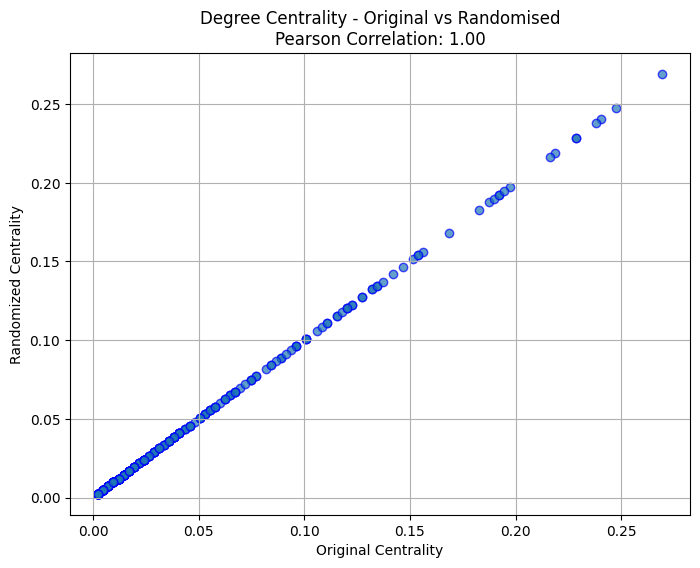

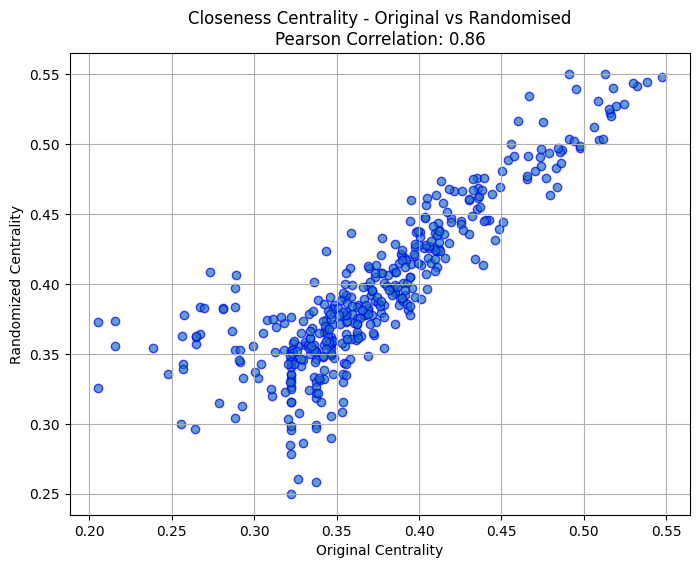

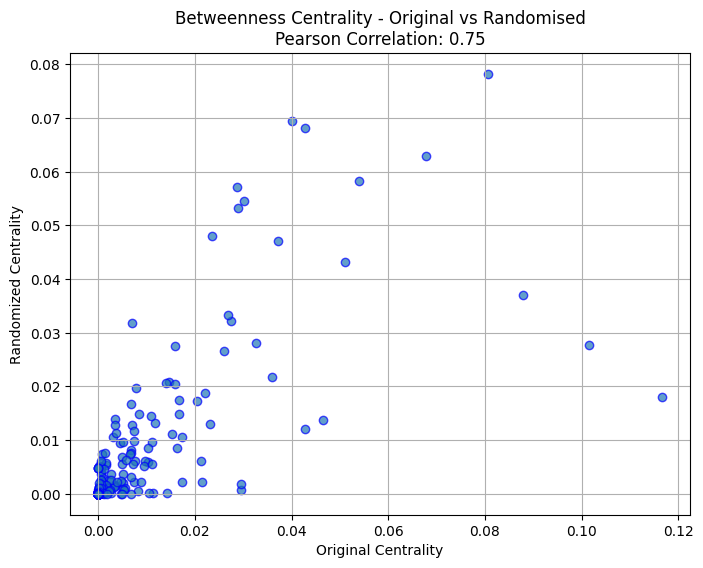

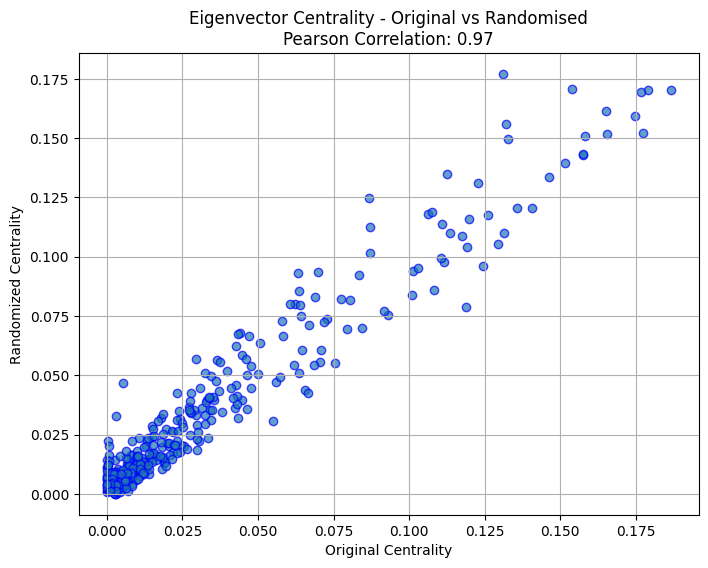

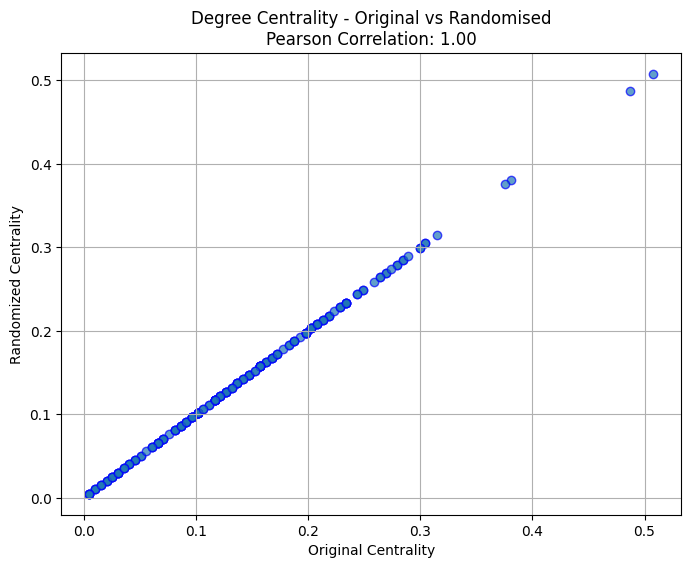

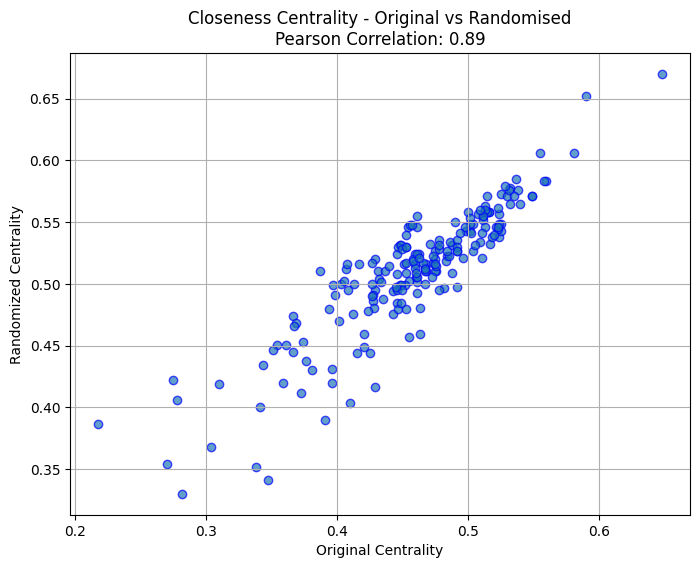

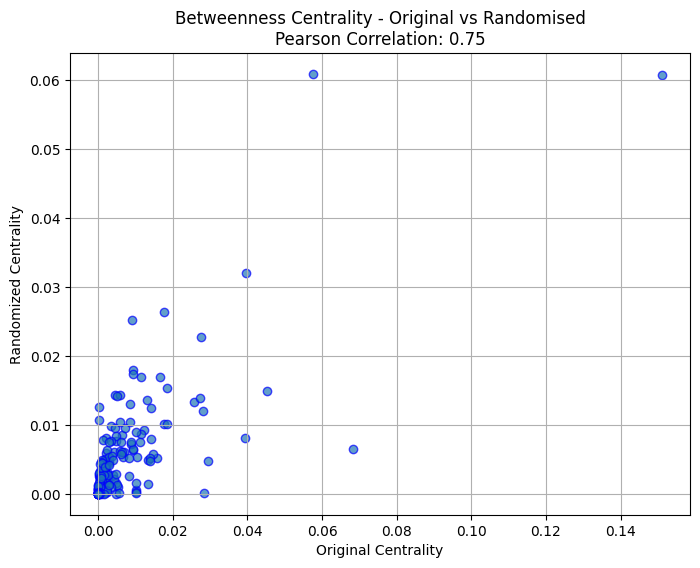

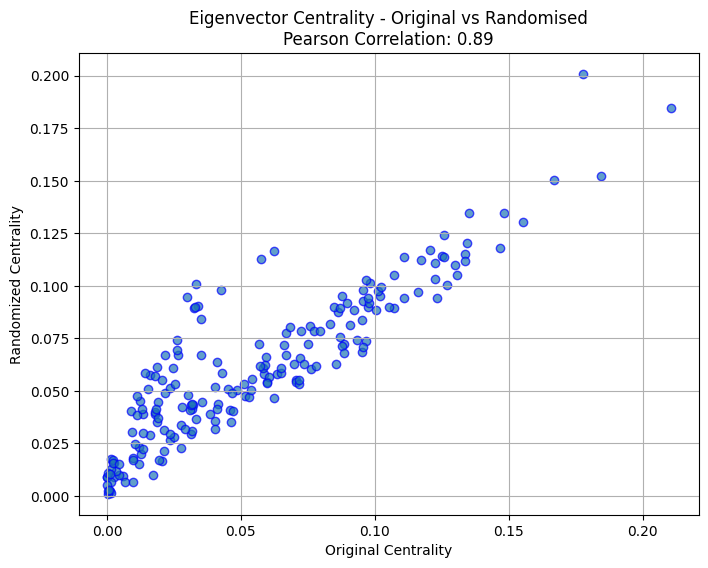

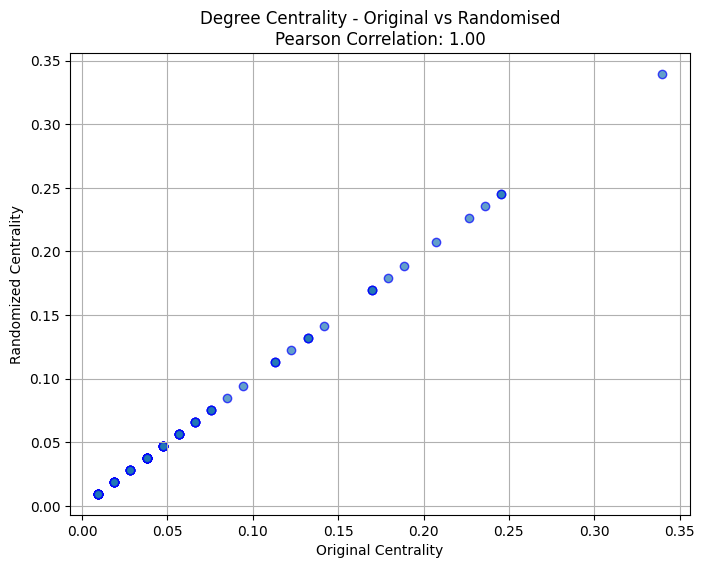

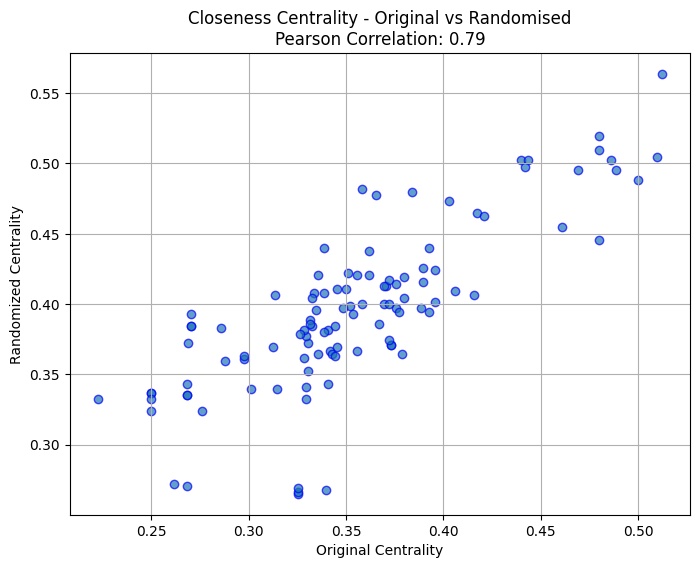

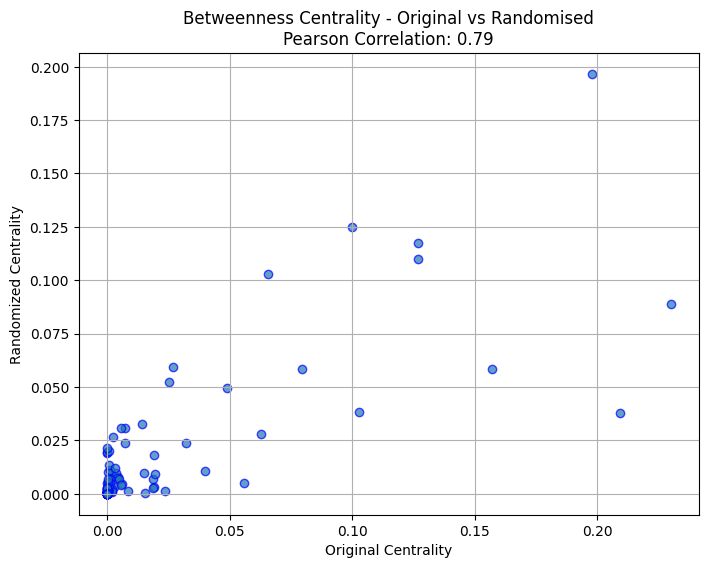

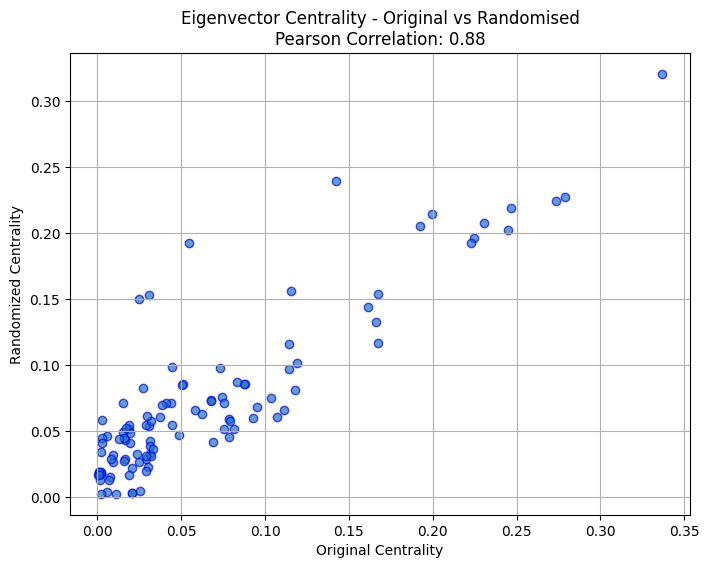

In [42]:
# Compute centralities for a given graph
def compute_centralities(graph):
    return {
        'Degree Centrality': nx.degree_centrality(graph),
        'Closeness Centrality': nx.closeness_centrality(graph),
        'Betweenness Centrality': nx.betweenness_centrality(graph),
        'Eigenvector Centrality': nx.eigenvector_centrality(graph)
    }

# Function to calculate Pearson correlation coefficient
def compute_pearson_correlation(x, y):
    pearson_corr, _ = stats.pearsonr(x, y)
    return pearson_corr

# Function to plot original vs randomized centralities with Pearson correlation
def plot_scatter_original_vs_random(original_values, random_values, centrality_name, graph_name):
    pearson_corr = compute_pearson_correlation(original_values, random_values)

    plt.figure(figsize=(8, 6))
    plt.scatter(original_values, random_values, alpha=0.7, edgecolor='b')

    # Add title with Pearson correlation
    plt.title(f'{centrality_name} - Original vs Randomised\nPearson Correlation: {pearson_corr:.2f}')
    plt.xlabel('Original Centrality')
    plt.ylabel('Randomized Centrality')
    plt.grid(True)
    plt.show()

# Randomize the graph using NetworkX's randomization technique
def randomize_graph(graph):
    # Randomize the graph while preserving the degree sequence using the double-edge swap
    random_graph = nx.double_edge_swap(graph.copy(), nswap=10*graph.number_of_edges(), max_tries=100*graph.number_of_edges())
    return random_graph

# Main code
for idx, G in enumerate(graphs):
    # Compute original centralities
    original_centralities = compute_centralities(G)

    # Randomize the graph
    G_random = randomize_graph(G)

    # Compute centralities for the randomized graph
    random_centralities = compute_centralities(G_random)

    # Plot scatter plots for each centrality comparison
    for centrality_name in original_centralities.keys():
        original_values = list(original_centralities[centrality_name].values())
        random_values = list(random_centralities[centrality_name].values())

        plot_scatter_original_vs_random(
            original_values,
            random_values,
            centrality_name,
            f'Graph {idx + 1}'
        )

# Observation: After running the code, you'll notice that for some centralities (like degree centrality), the correlation between the original and randomized versions is quite high, as randomization preserves the degree distribution. However, for other centralities like betweenness and eigenvector, the correlation is lower, as these centralities are more sensitive to the structure of the graph, which changes more significantly when randomizing edges.


## Exercise 4
(1 point) Provide an interpretation of each centrality, rooting it in the results you computed in the previous
points and the real‑world relations the networks are describing. Explain the interpretation of each
centrality and the observed differences and similarities reported in the previous points.

### Interpretation of Each Centrality in the Context of the Networks

#### 1. **Degree Centrality**:
   - **Definition**: Degree centrality measures the number of connections a node has. It reflects how many immediate neighbors a node is connected to.
   - **Interpretation in Real-World Networks**:
     - In a social network, a node with high degree centrality could represent an individual who knows many people (a well-connected person). In a network like an airline route map, a city with high degree centrality could be a major hub that has many direct flights to other cities.
     - **Similarities in Randomization**: When we randomize the graph while preserving the degree distribution (using `nx.double_edge_swap`), we observe a high correlation between the degree centralities of the original and randomized networks. This is expected because the randomization process preserves the degree sequence. Therefore, the node's degree (the number of connections) stays the same, even though the specific neighbors might change.
   - **Key Takeaway**: Degree centrality remains relatively stable during randomization because it only depends on the number of connections, not the specific structure of the network.

#### 2. **Closeness Centrality**:
   - **Definition**: Closeness centrality measures how quickly a node can reach all other nodes in the network. A node with high closeness centrality has short paths to all other nodes.
   - **Interpretation in Real-World Networks**:
     - In a social network, a person with high closeness centrality can easily interact with others, either directly or via a few intermediaries. In an airline network, a city with high closeness centrality would be well-positioned to reach all other cities with the fewest layovers.
     - **Impact of Randomization**: When we randomize the network, the closeness centrality often decreases, and the correlation between the original and randomized centrality values drops. This is because randomizing the edges disrupts the efficient paths that originally existed, meaning that nodes no longer maintain the same closeness to others.
   - **Key Takeaway**: Closeness centrality is highly dependent on the overall structure of the network, and randomization significantly affects it by disrupting efficient paths between nodes.

#### 3. **Betweenness Centrality**:
   - **Definition**: Betweenness centrality measures how often a node lies on the shortest path between other nodes. A node with high betweenness centrality has control over information flow in the network.
   - **Interpretation in Real-World Networks**:
     - In a social network, a person with high betweenness centrality often acts as a bridge between different groups, controlling the flow of information between them. In transportation networks, a city with high betweenness centrality serves as a key transit point for passengers traveling between other cities.
     - **Impact of Randomization**: Betweenness centrality is highly sensitive to changes in the network structure. Randomization typically lowers the correlation between the original and randomized betweenness centrality, as randomizing the edges alters the shortest paths significantly. A node that was a key bridge in the original network may lose that role in the randomized network.
   - **Key Takeaway**: Betweenness centrality is highly affected by randomization because it depends on the specific paths in the network, which are disrupted by edge swaps.

#### 4. **Eigenvector Centrality**:
   - **Definition**: Eigenvector centrality measures the influence of a node, taking into account the centrality of its neighbors. A node with high eigenvector centrality is connected to many important (high-centrality) nodes.
   - **Interpretation in Real-World Networks**:
     - In social networks, eigenvector centrality can identify influencers who are connected to other influencers. In transportation networks, a city with high eigenvector centrality is well-connected not only directly but also through highly influential hubs.
     - **Impact of Randomization**: Similar to betweenness centrality, eigenvector centrality is sensitive to changes in network structure. Randomization can lower its correlation with the original graph because it depends on the connections of neighbors. If a node's neighbors change, especially if those neighbors are influential, the node's eigenvector centrality can change significantly.
   - **Key Takeaway**: Eigenvector centrality is sensitive to changes in the network, and randomization disrupts the local and global structure of the network, leading to lower correlations.

---

### Summary of Observed Differences and Similarities:
- **Degree Centrality** is the most robust to randomization because it directly reflects the number of connections, which are preserved in degree-preserving randomization.
- **Closeness Centrality**, **Betweenness Centrality**, and **Eigenvector Centrality** are more sensitive to network structure. As a result, these centralities are significantly affected by randomization, as the shortcuts, key pathways, and influential neighbors are altered.
- **Pearson Correlation**: The correlation values between the original and randomized networks highlight these differences. For degree centrality, the correlation remains high, while for the other centralities, the correlations drop, reflecting the dependence of these metrics on the specific structure of the graph.

In real-world networks, **degree centrality** may remain consistent in terms of the number of connections even if the network's structure is disrupted (randomized). However, **closeness**, **betweenness**, and **eigenvector centralities** capture more nuanced aspects of the network's structure, which are not preserved when the network is randomized.


## Export this ipynb file as pdf


In [27]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc -qq > /dev/null 2>&1
!pip install pypandoc -q > /dev/null 2>&1

In [28]:
import os
import requests

# URL of the raw file to download
file_url = "https://raw.githubusercontent.com/UZH-Cyrill-Meier/NetworkScience/main/Assignments/assignment%203/assignment3.ipynb"

# Local path to save the file (root directory)
file_name = file_url.split('/')[-1]  # Extract the file name from the URL
local_path = os.path.join(os.getcwd(), file_name)  # Save in the current directory (root)

# Function to download the file
def download_file(url, path):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        with open(path, 'wb') as file:
            file.write(response.content)
        print(f"File downloaded successfully: {path}")
    except Exception as e:
        print(f"An error occurred while downloading the file: {e}")

# Download the file
download_file(file_url, local_path)



File downloaded successfully: /content/assignment3.ipynb


In [26]:
!jupyter nbconvert --to PDF "assignment3.ipynb"

[NbConvertApp] Converting notebook assignment3.ipynb to PDF
[NbConvertApp] Writing 61072 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 60303 bytes to assignment3.pdf
